# Proyek Casptone Klasifikasi Diabetes: DiaMate





In [1]:
import kagglehub
alexteboul_diabetes_health_indicators_dataset_path = kagglehub.dataset_download('alexteboul/diabetes-health-indicators-dataset')

print('Data source import complete.')


Data source import complete.


## Import Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

## Data Preparation

### Data Loading

In [3]:
data = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

In [4]:
# Menampilkan dataset
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Data Preparation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data['Age']=data['Age'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Income']=data['Income'].astype('int64')
data['BMI']=data['BMI'].astype('int64')
data['CholCheck']=data['CholCheck'].astype('int64')
data['Smoker']=data['Smoker'].astype('int64')
data['Stroke']=data['Stroke'].astype('int64')
data['HeartDiseaseorAttack']=data['HeartDiseaseorAttack'].astype('int64')
data['PhysActivity']=data['PhysActivity'].astype('int64')
data['Fruits']=data['Fruits'].astype('int64')
data['Veggies']=data['Veggies'].astype('int64')
data['HvyAlcoholConsump']=data['HvyAlcoholConsump'].astype('int64')
data['AnyHealthcare']=data['AnyHealthcare'].astype('int64')
data['NoDocbcCost']=data['NoDocbcCost'].astype('int64')
data['GenHlth']=data['GenHlth'].astype('int64')
data['MentHlth']=data['MentHlth'].astype('int64')
data['PhysHlth']=data['PhysHlth'].astype('int64')
data['DiffWalk']=data['DiffWalk'].astype('int64')
data['Sex']=data['Sex'].astype('int64')
data['Diabetes_012']=data['Diabetes_012'].astype('int64')
data['HighBP']=data['HighBP'].astype('int64')
data['HighChol']=data['HighChol'].astype('int64')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Data Cleaning

In [8]:
data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [9]:
data.duplicated().sum()

np.int64(23899)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(229781, 22)

Organize Columns

In [12]:
data = data.rename(columns={'Diabetes_012': 'Diabetes'})

In [ ]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [13]:
data

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [14]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

Diabetes : Diabetes
0    190055
2     35097
1      4629
Name: count, dtype: int64

HighBP : HighBP
0    125359
1    104422
Name: count, dtype: int64

HighChol : HighChol
0    128273
1    101508
Name: count, dtype: int64

CholCheck : CholCheck
1    220483
0      9298
Name: count, dtype: int64

BMI : BMI
27    21551
26    17808
24    16537
28    14933
25    14809
      ...  
85        1
86        1
91        1
90        1
78        1
Name: count, Length: 84, dtype: int64

Smoker : Smoker
0    122781
1    107000
Name: count, dtype: int64

Stroke : Stroke
0    219497
1     10284
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0    206064
1     23717
Name: count, dtype: int64

PhysActivity : PhysActivity
1    168511
0     61270
Name: count, dtype: int64

Fruits : Fruits
1    140848
0     88933
Name: count, dtype: int64

Veggies : Veggies
1    182633
0     47148
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    215831
1     13950
Name: count, dtype:

**EDA**

In [15]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

,0
Diabetes,2025
HighBP,2025
HighChol,2025
CholCheck,2025
BMI,2025
Smoker,2025
Stroke,2025
HeartDiseaseorAttack,2025
PhysActivity,2025
Fruits,2025


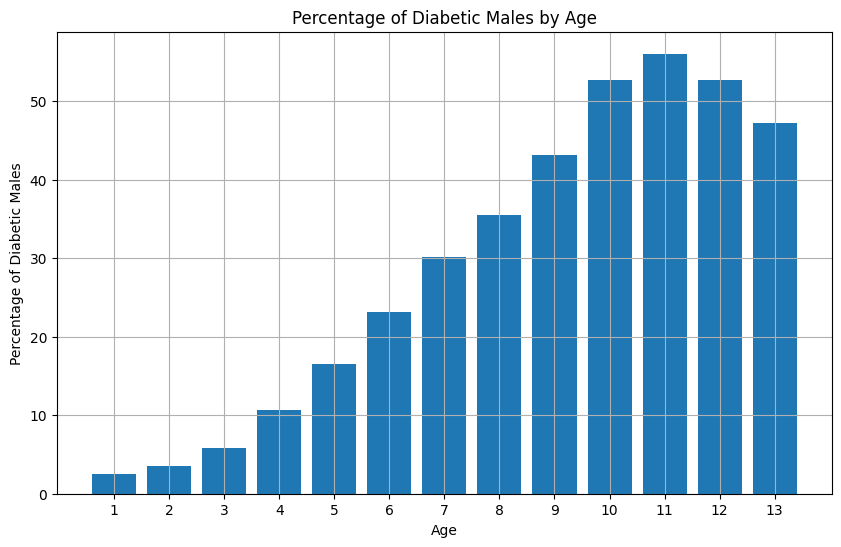

Maximum percentage of diabetic males is 56.05% at age 11.


In [16]:
# frequency of diabetics of all ages for male

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


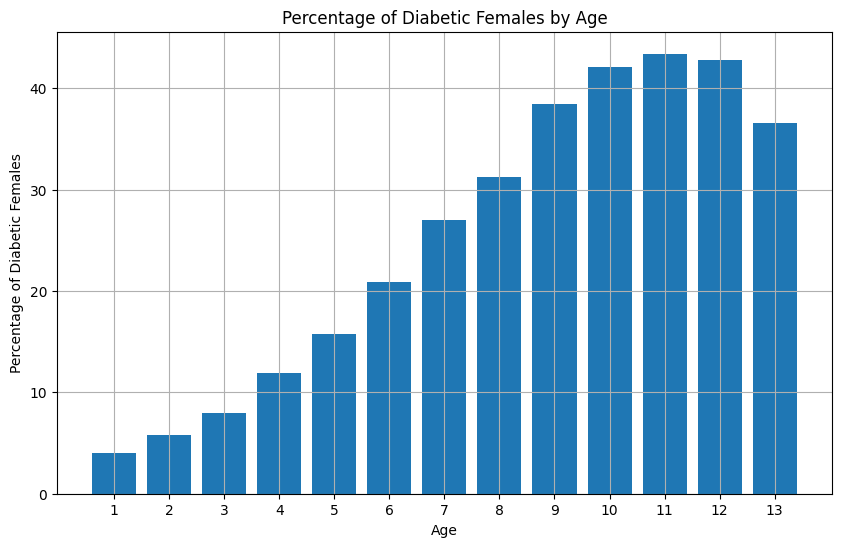

Maximum percentage of diabetic females is 43.42% at age 11.


In [17]:
# frequency of diabetics of all ages for female

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


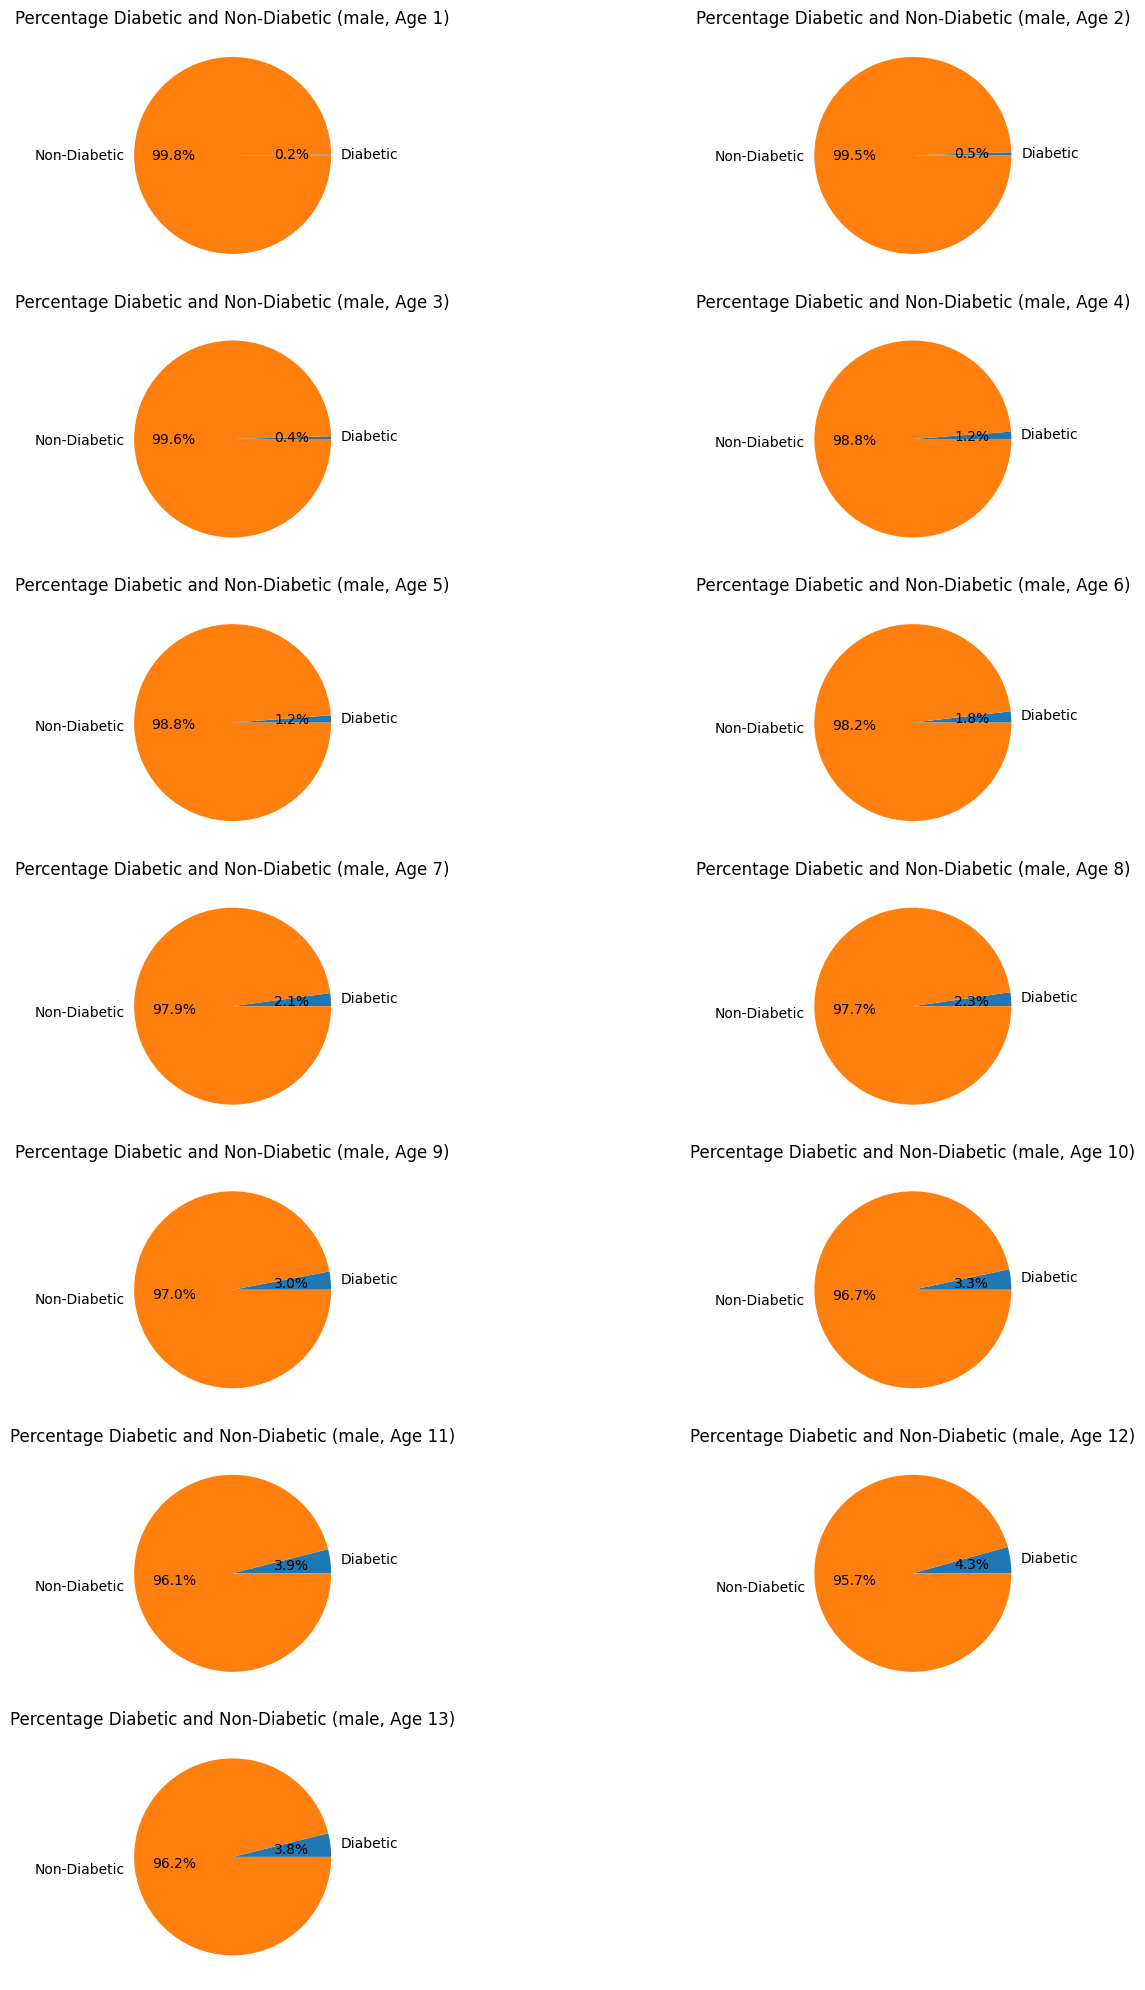

In [18]:
# percentage of diabetics and nondiabetics for male in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 1) & (data['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (male, Age {age})')
plt.tight_layout()
plt.show()


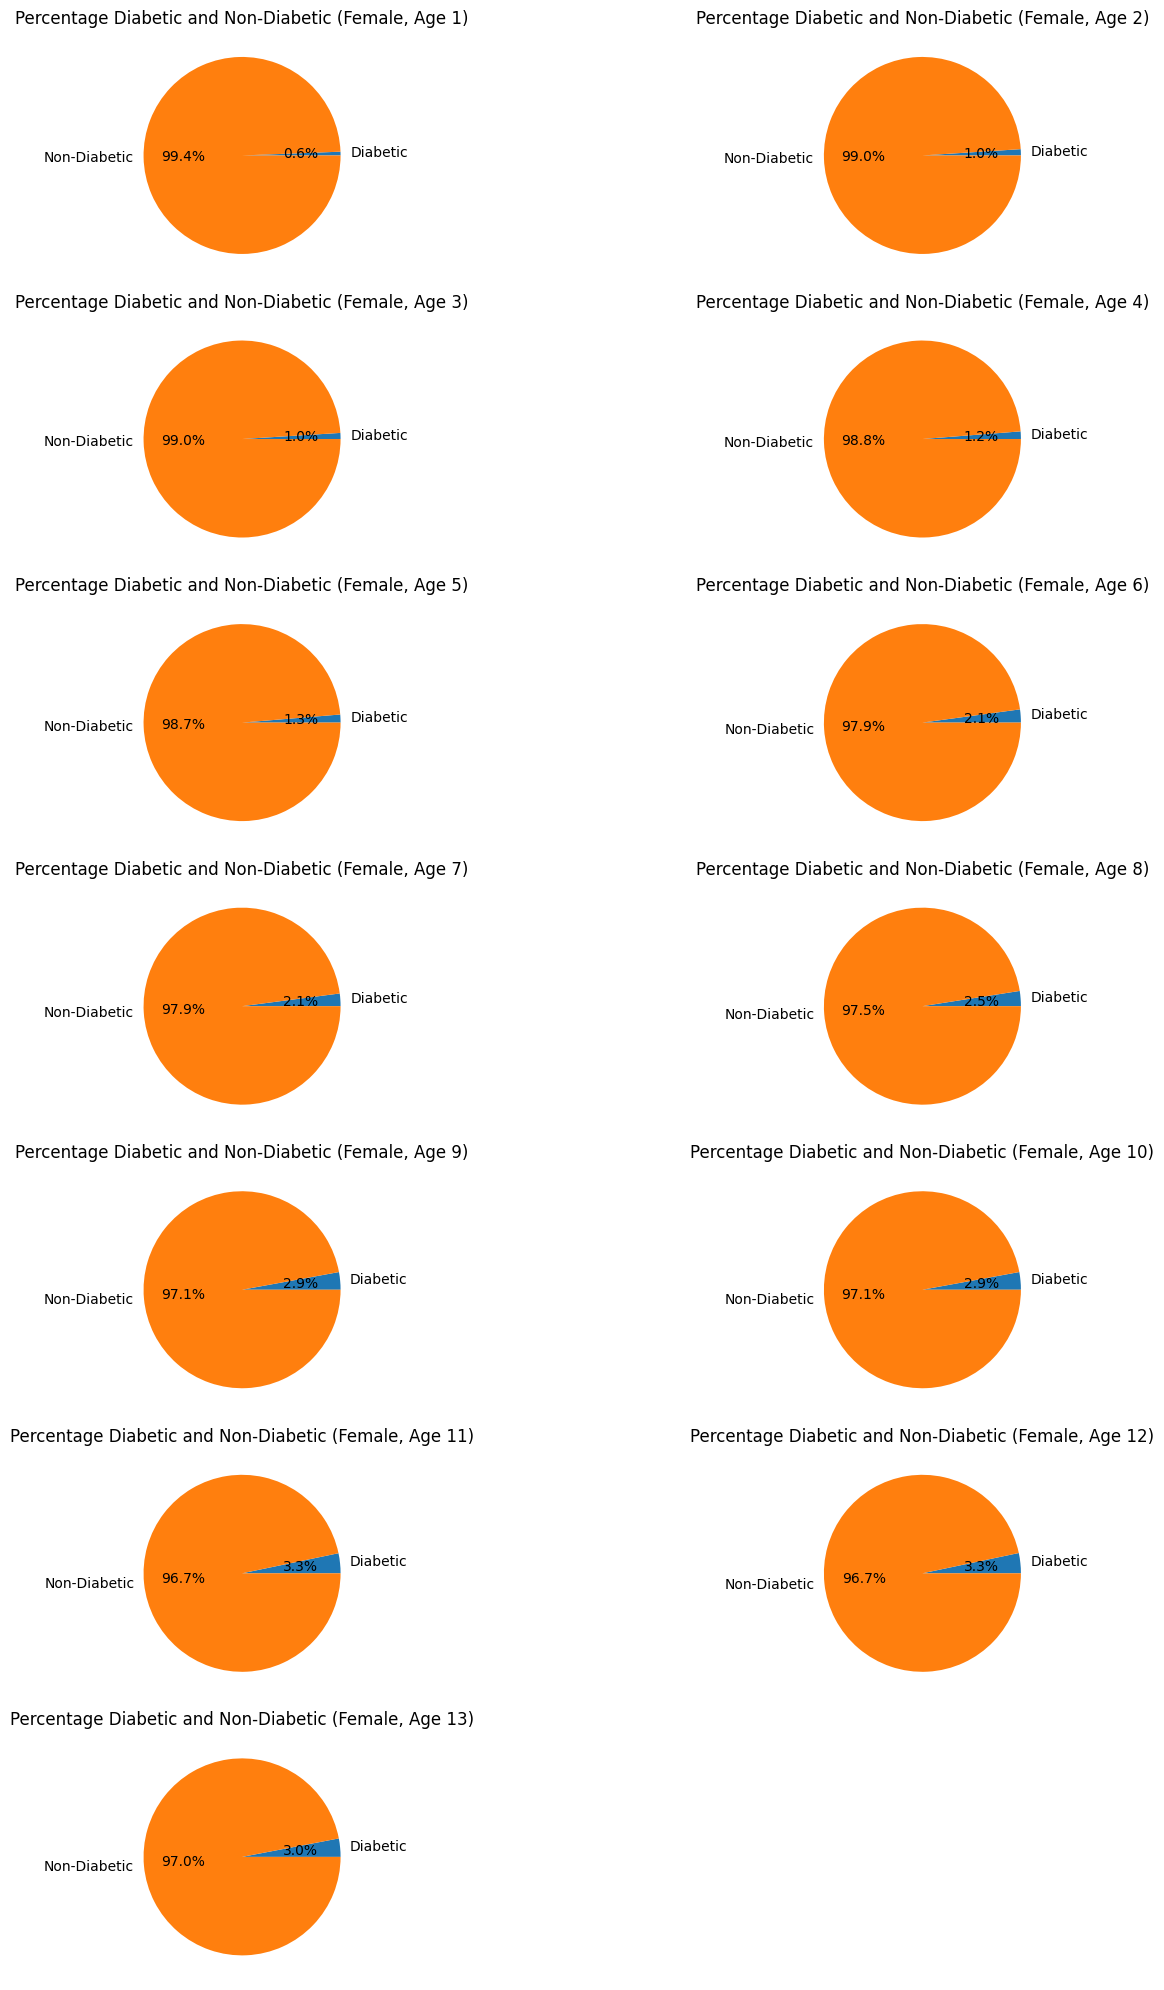

In [19]:
# percentage of diabetics and nondiabetics for female in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 0) & (data['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (Female, Age {age})')
plt.tight_layout()
plt.show()


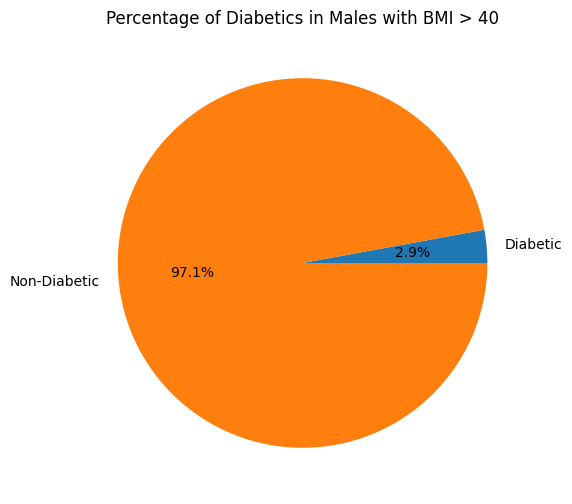

Percentage of diabetics in males with BMI > 40: 2.9%


In [20]:
# Filter data for males with BMI > 40
male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with BMI > 40')
plt.show()

print(f"Percentage of diabetics in males with BMI > 40: {percent_diabetic:.1f}%")


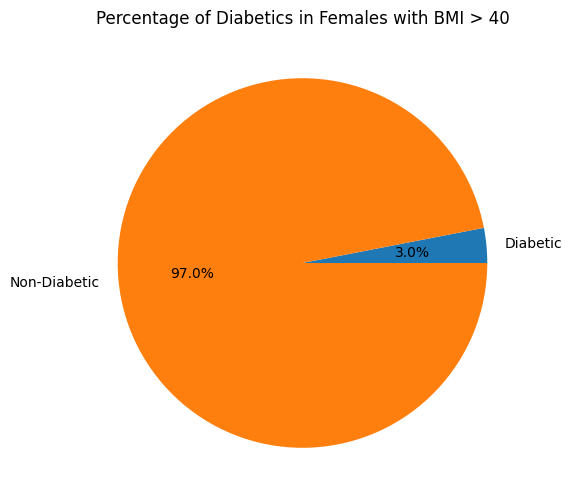

Percentage of diabetics in females with BMI > 40: 3.0%


In [21]:
# Filter data for females with BMI > 40
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with BMI > 40')
plt.show()

print(f"Percentage of diabetics in females with BMI > 40: {percent_diabetic:.1f}%")


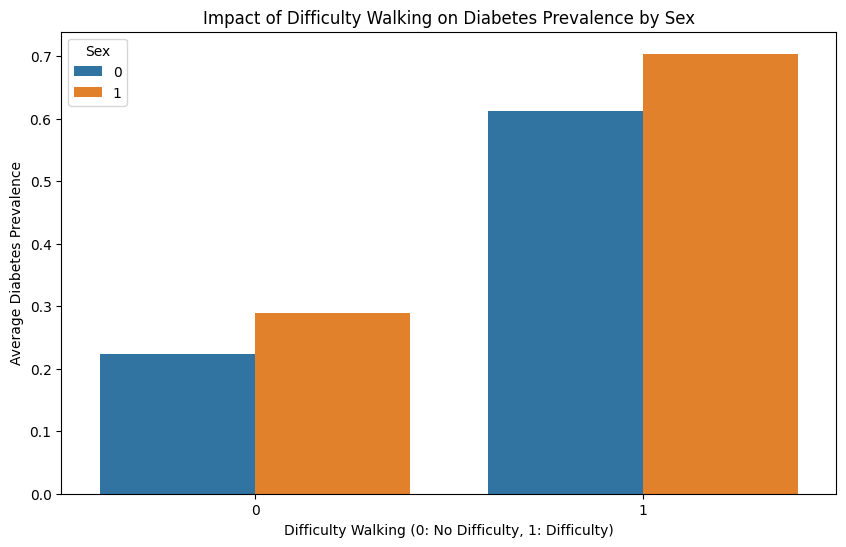

In [22]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = data.groupby(['Sex', 'DiffWalk'])['Diabetes'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()


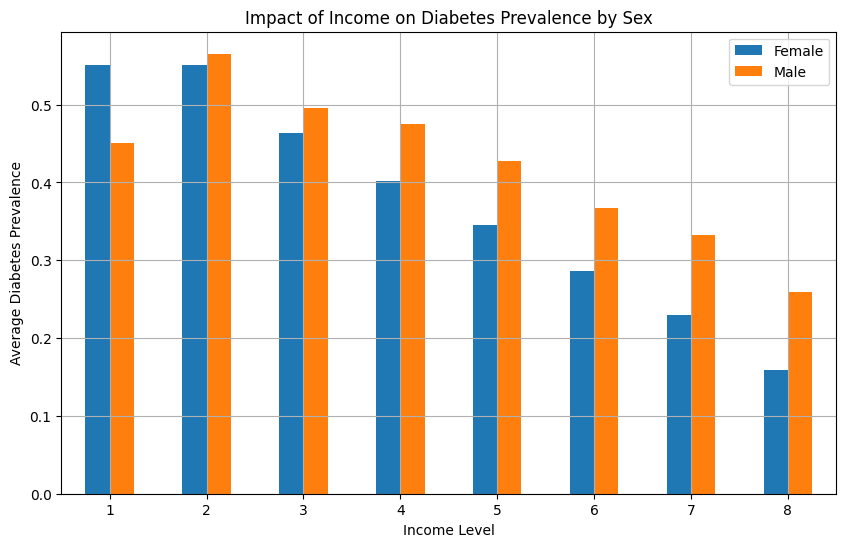

In [23]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

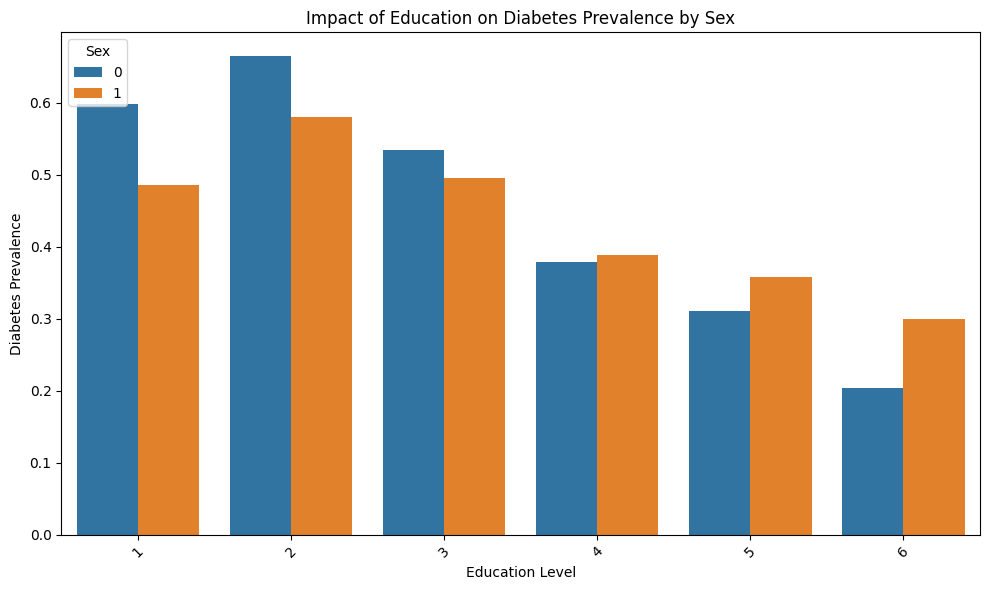

In [24]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper left')
plt.tight_layout()
plt.show()


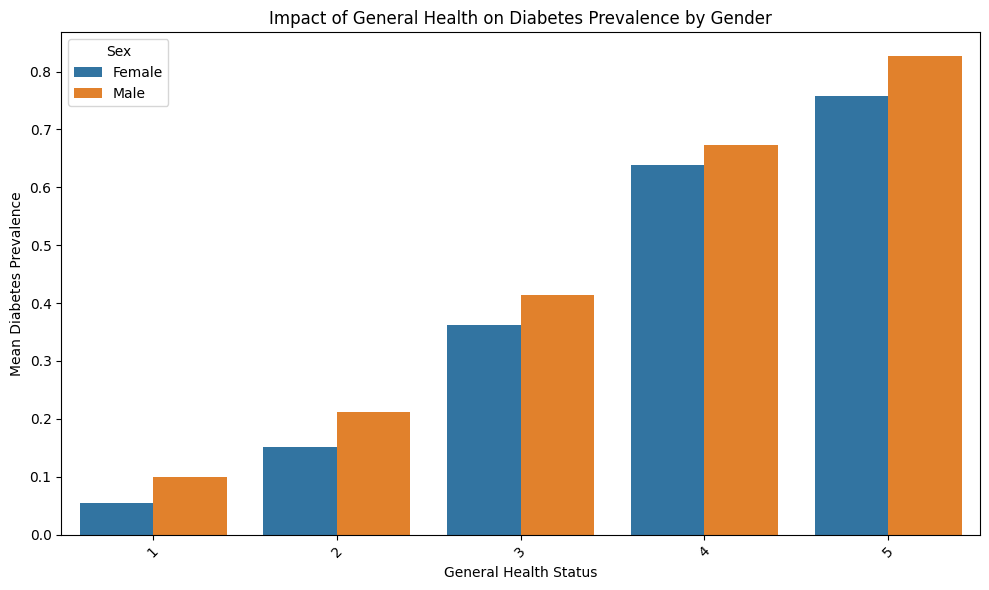

In [25]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


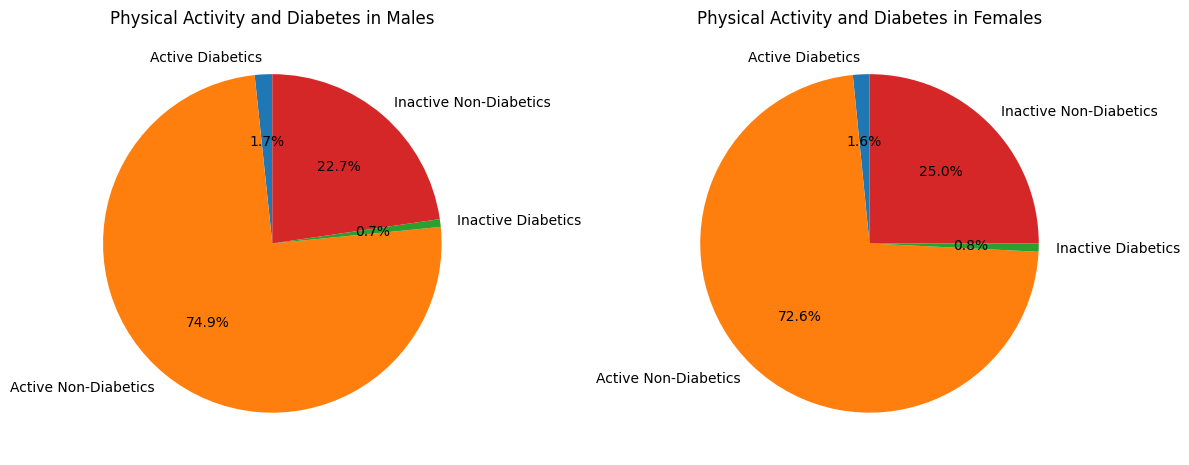

In [26]:
# the percent impact of PhysActivity  in  diabetic for male and female

male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for males
male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for females
female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Physical Activity and Diabetes in Males')

# Female pie chart
axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Physical Activity and Diabetes in Females')

plt.tight_layout()
plt.show()


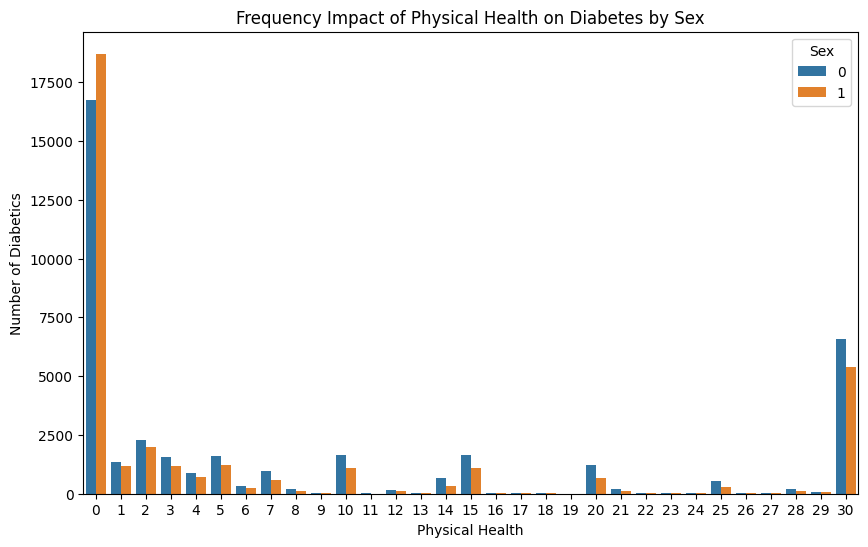

In [27]:
#the frequency impact of   physicalhlth  in diabetic for male and female

# physicalhlth :- which includes physical illness and injury, for how many days during the past 30
diabetic_by_sex_physhlth = data.groupby(['Sex', 'PhysHlth'])['Diabetes'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PhysHlth', y='Diabetes', hue='Sex', data=diabetic_by_sex_physhlth)
plt.xlabel('Physical Health')
plt.ylabel('Number of Diabetics')
plt.title('Frequency Impact of Physical Health on Diabetes by Sex')
plt.show()


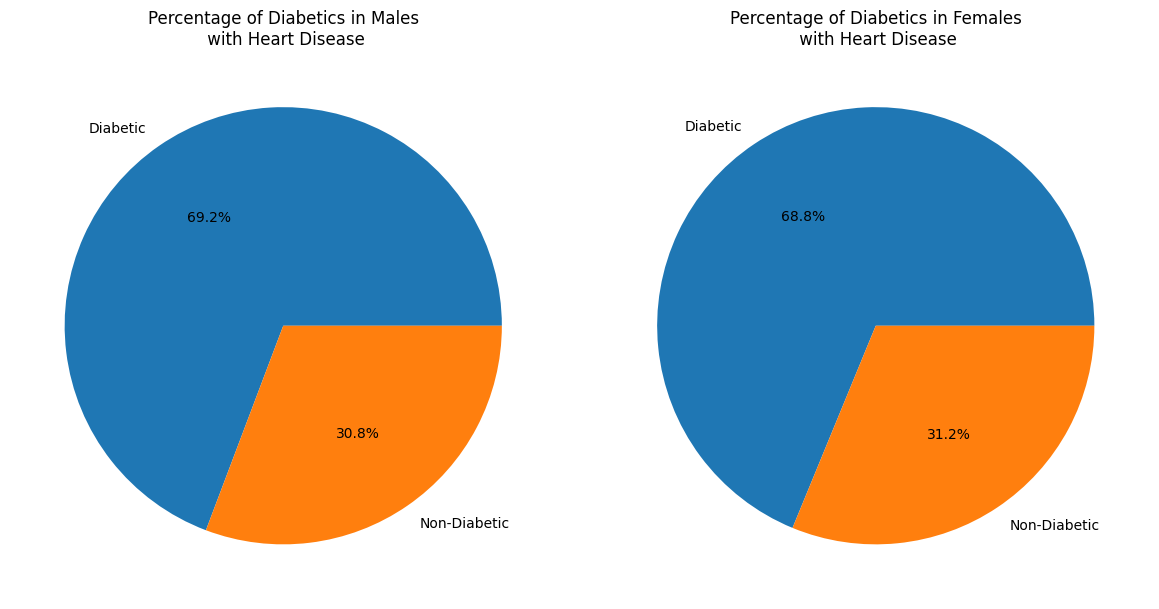

Percentage of diabetics in males with heart disease: 69.2%
Percentage of diabetics in males without heart disease: 29.9%
Percentage of diabetics in females with heart disease: 68.8%
Percentage of diabetics in females without heart disease: 27.2%


In [28]:
#the percent impact of   HeartDiseaseorAttack in diabetic for male and female

male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

# Calculate percentages of diabetics for each group
male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males\n with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females\n with Heart Disease')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with heart disease: {male_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in males without heart disease: {male_nohd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females with heart disease: {female_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females without heart disease: {female_nohd_diabetic_percent:.1f}%")


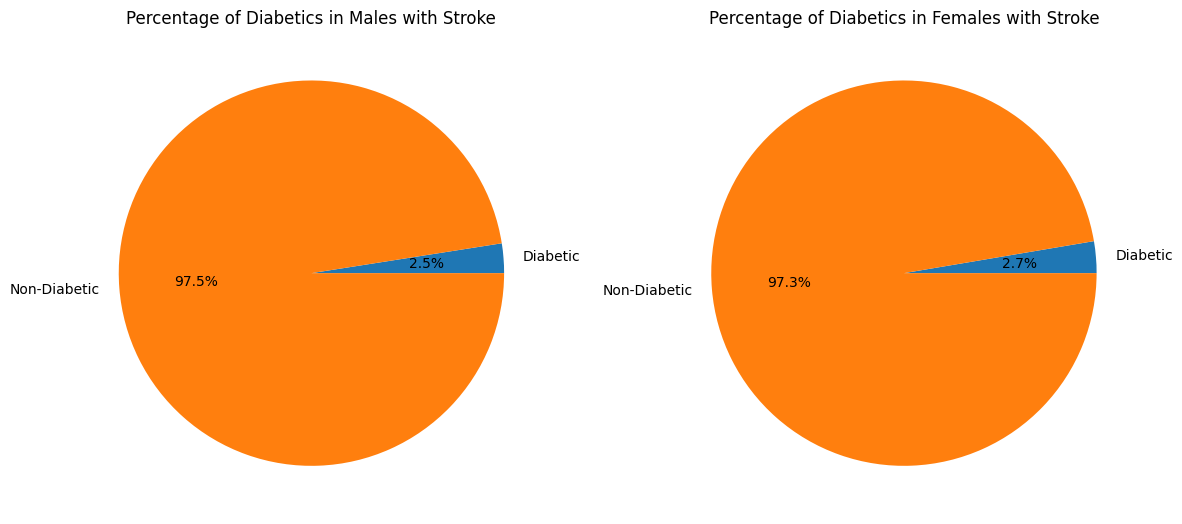

Percentage of diabetics in males with stroke: 2.5%
Percentage of diabetics in females with stroke: 2.7%


In [29]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")


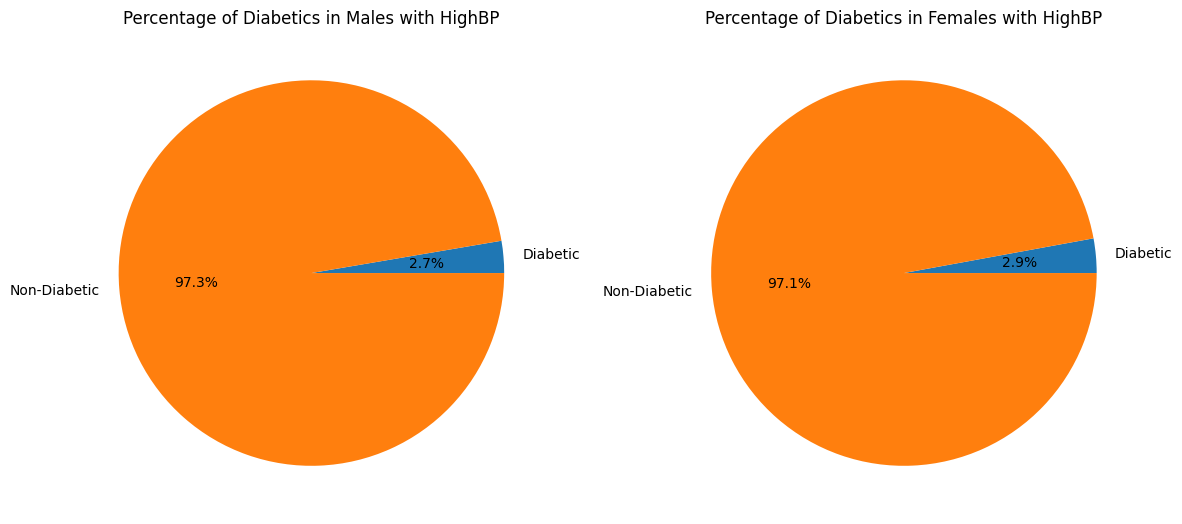

Percentage of diabetics in males with HighBP: 2.7%
Percentage of diabetics in females with HighBP: 2.9%


In [30]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")


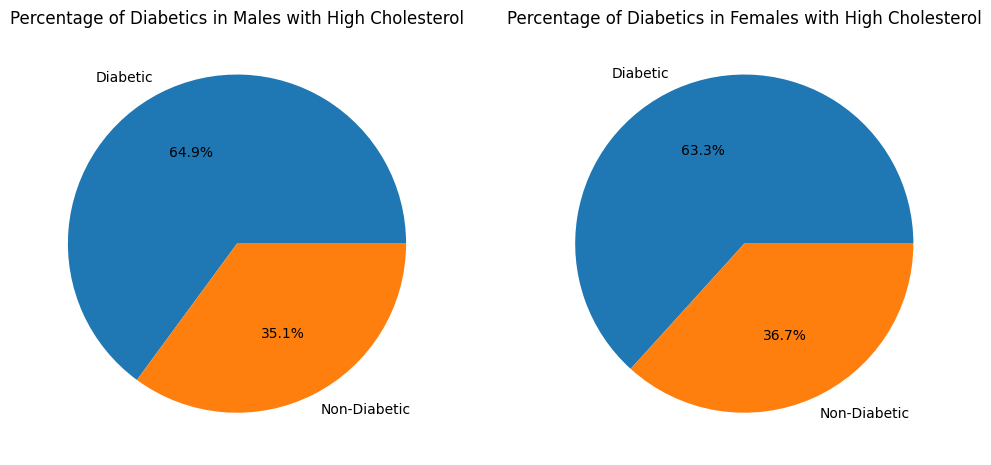

In [ ]:
# Filter data for males and females with and without HighChol
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

# Calculate percentages of diabetics
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

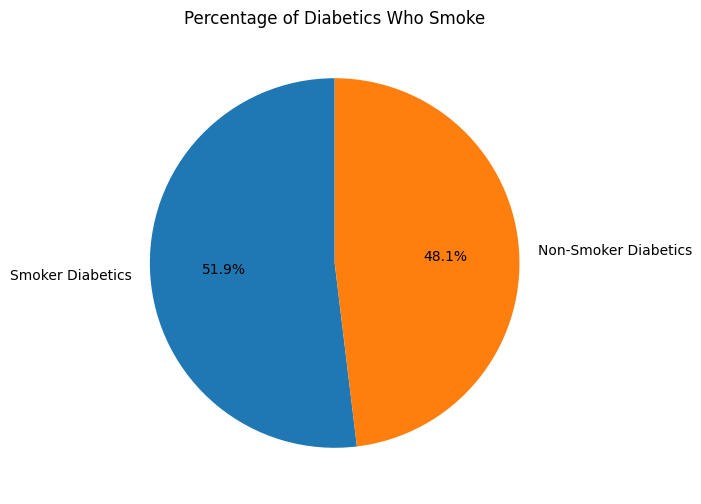

In [ ]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()


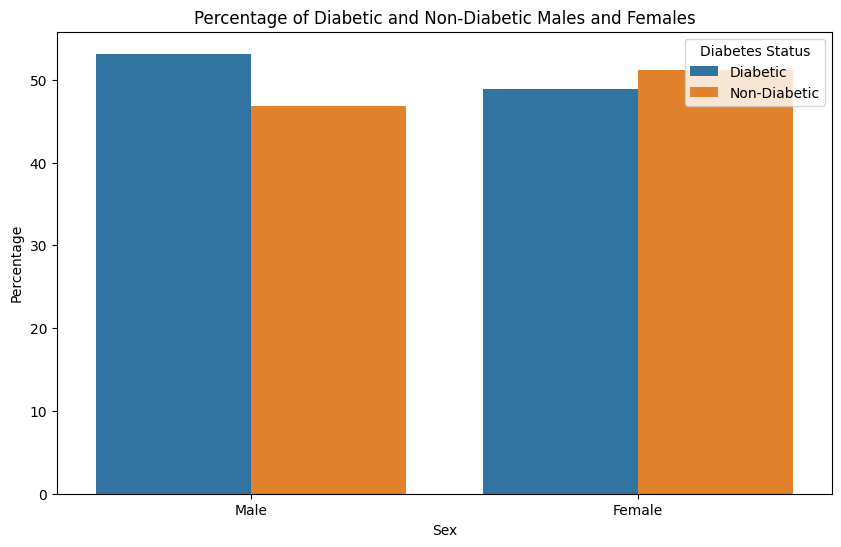

In [ ]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

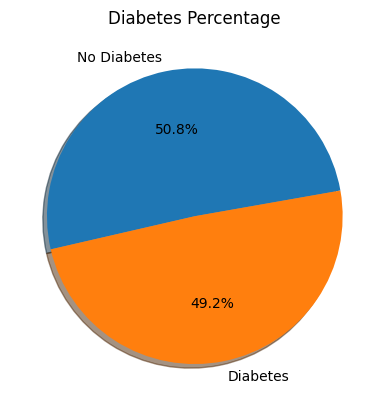

In [ ]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()


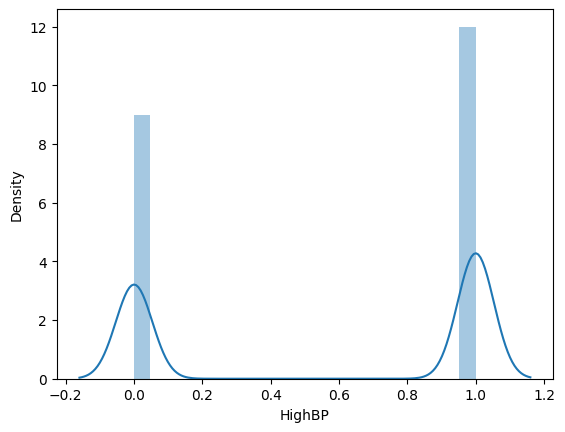

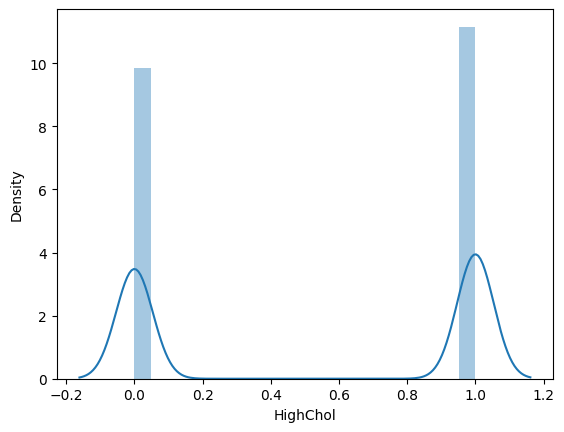

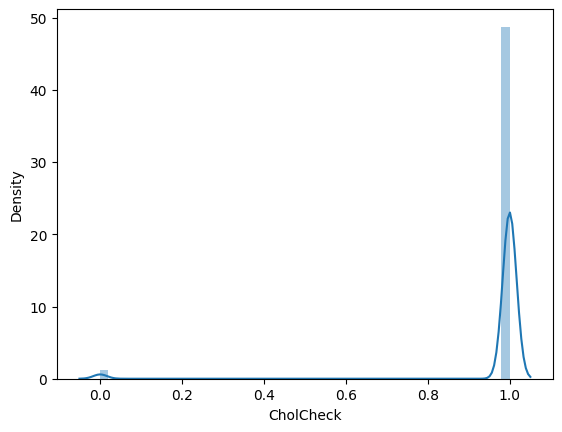

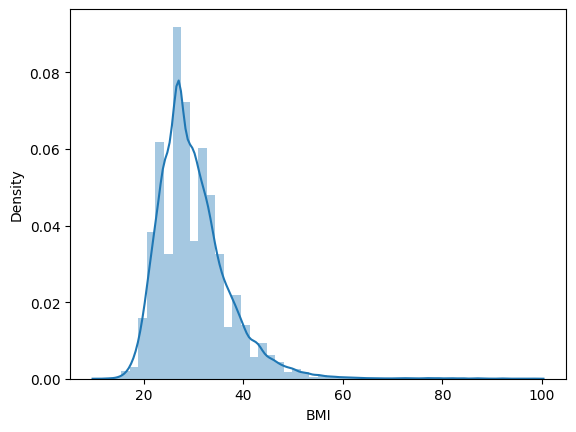

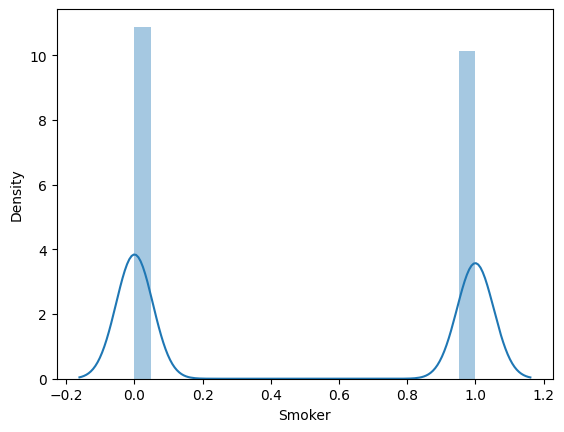

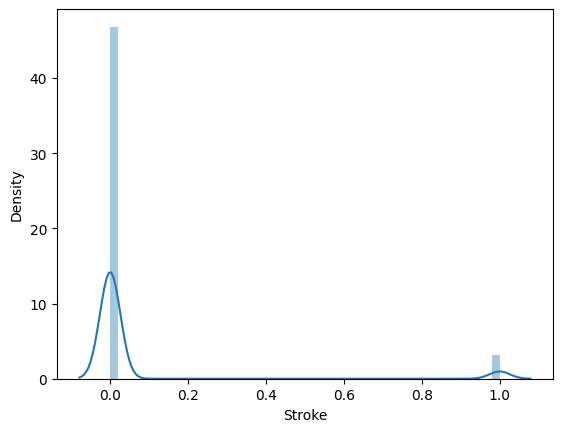

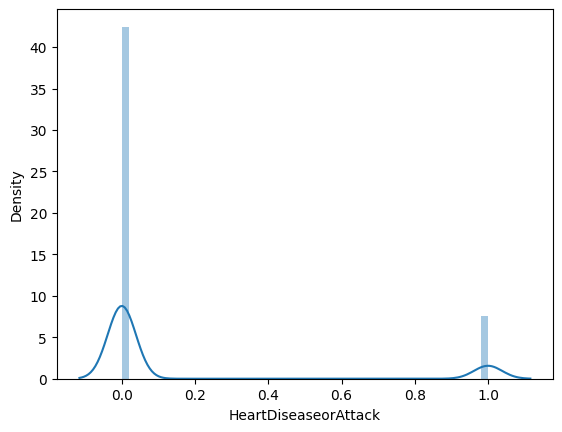

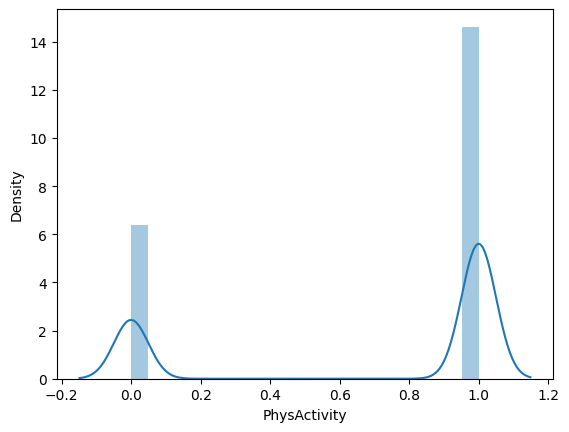

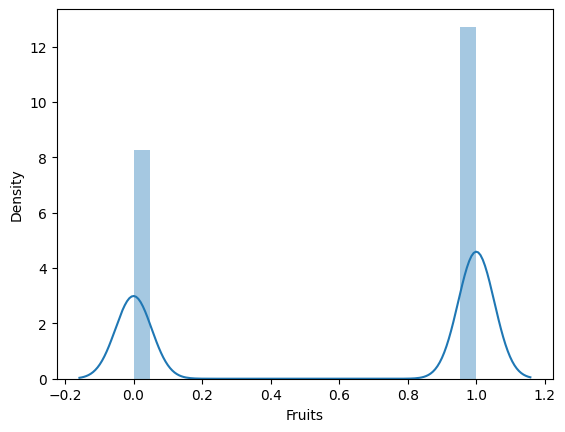

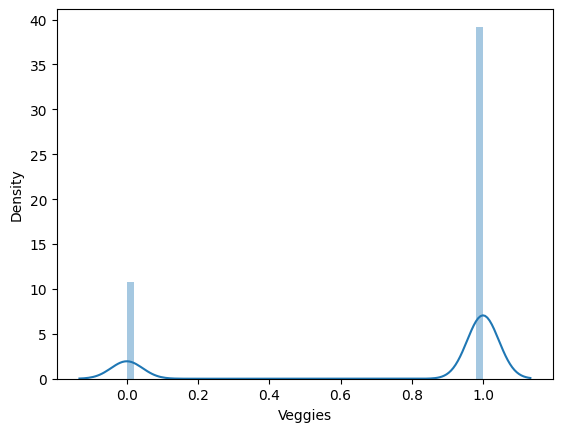

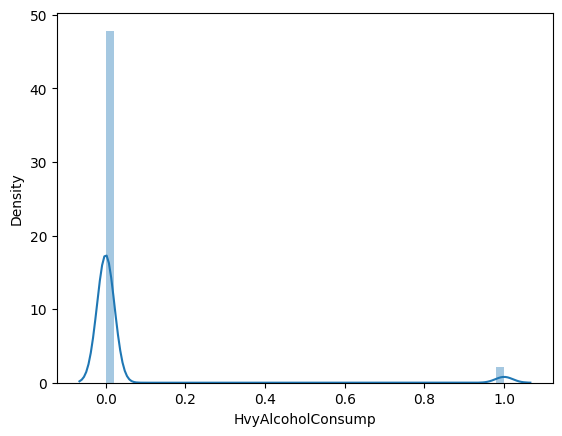

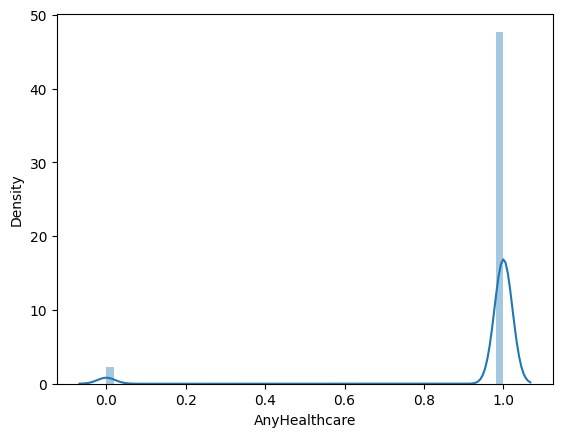

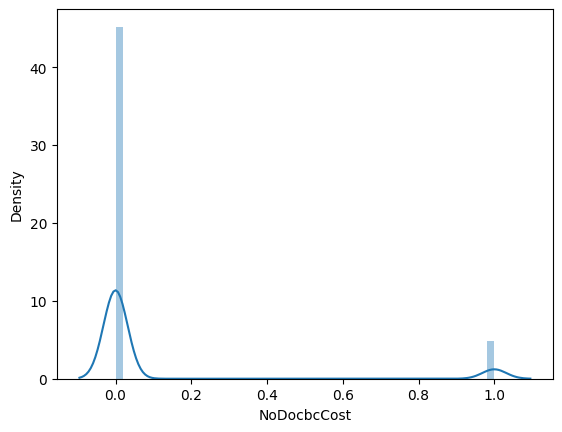

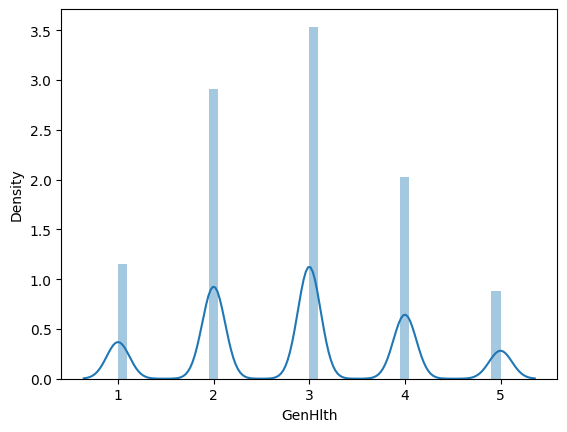

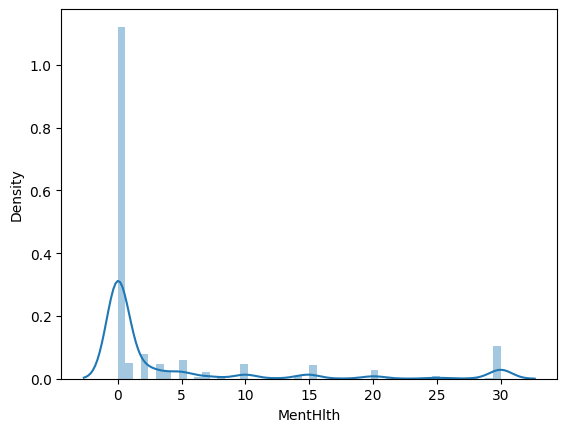

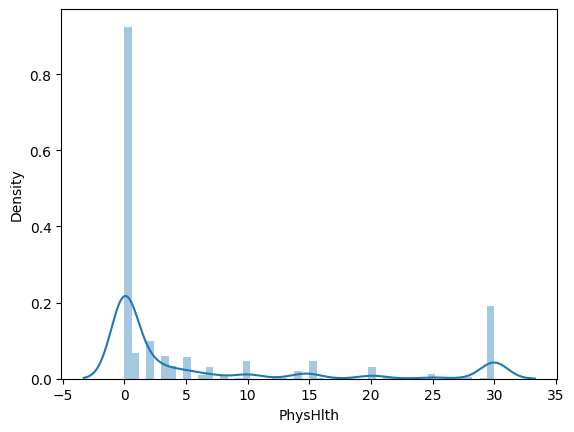

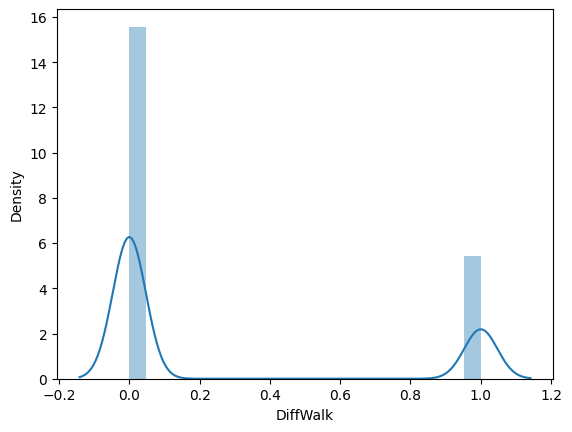

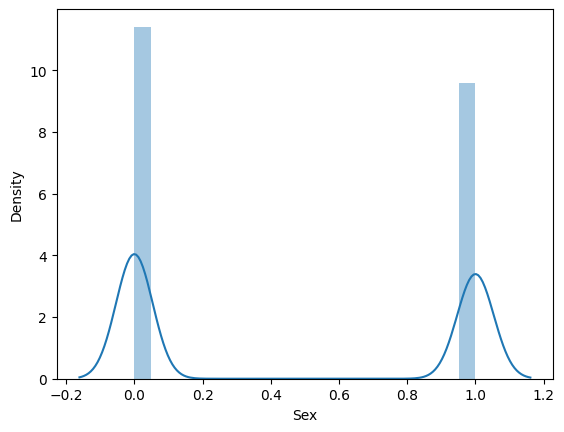

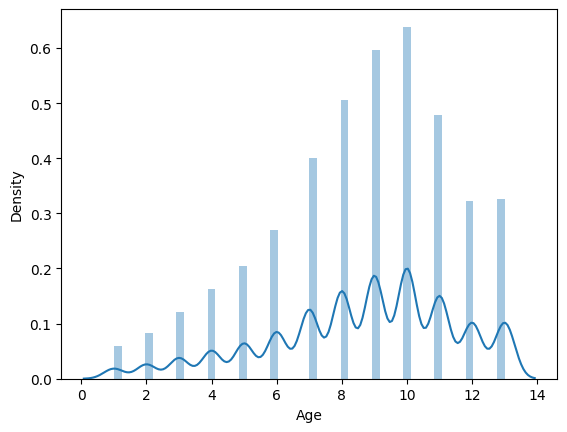

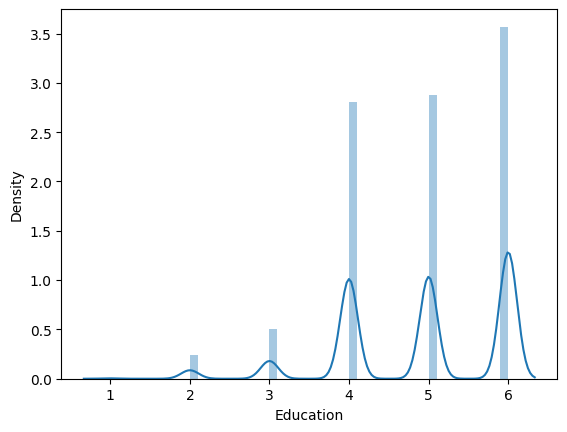

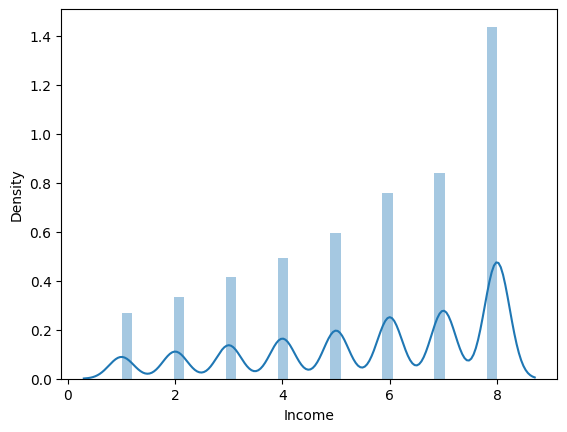

In [ ]:
for col in data.columns[:-1]:
  sns.distplot(data[col])
  plt.show()

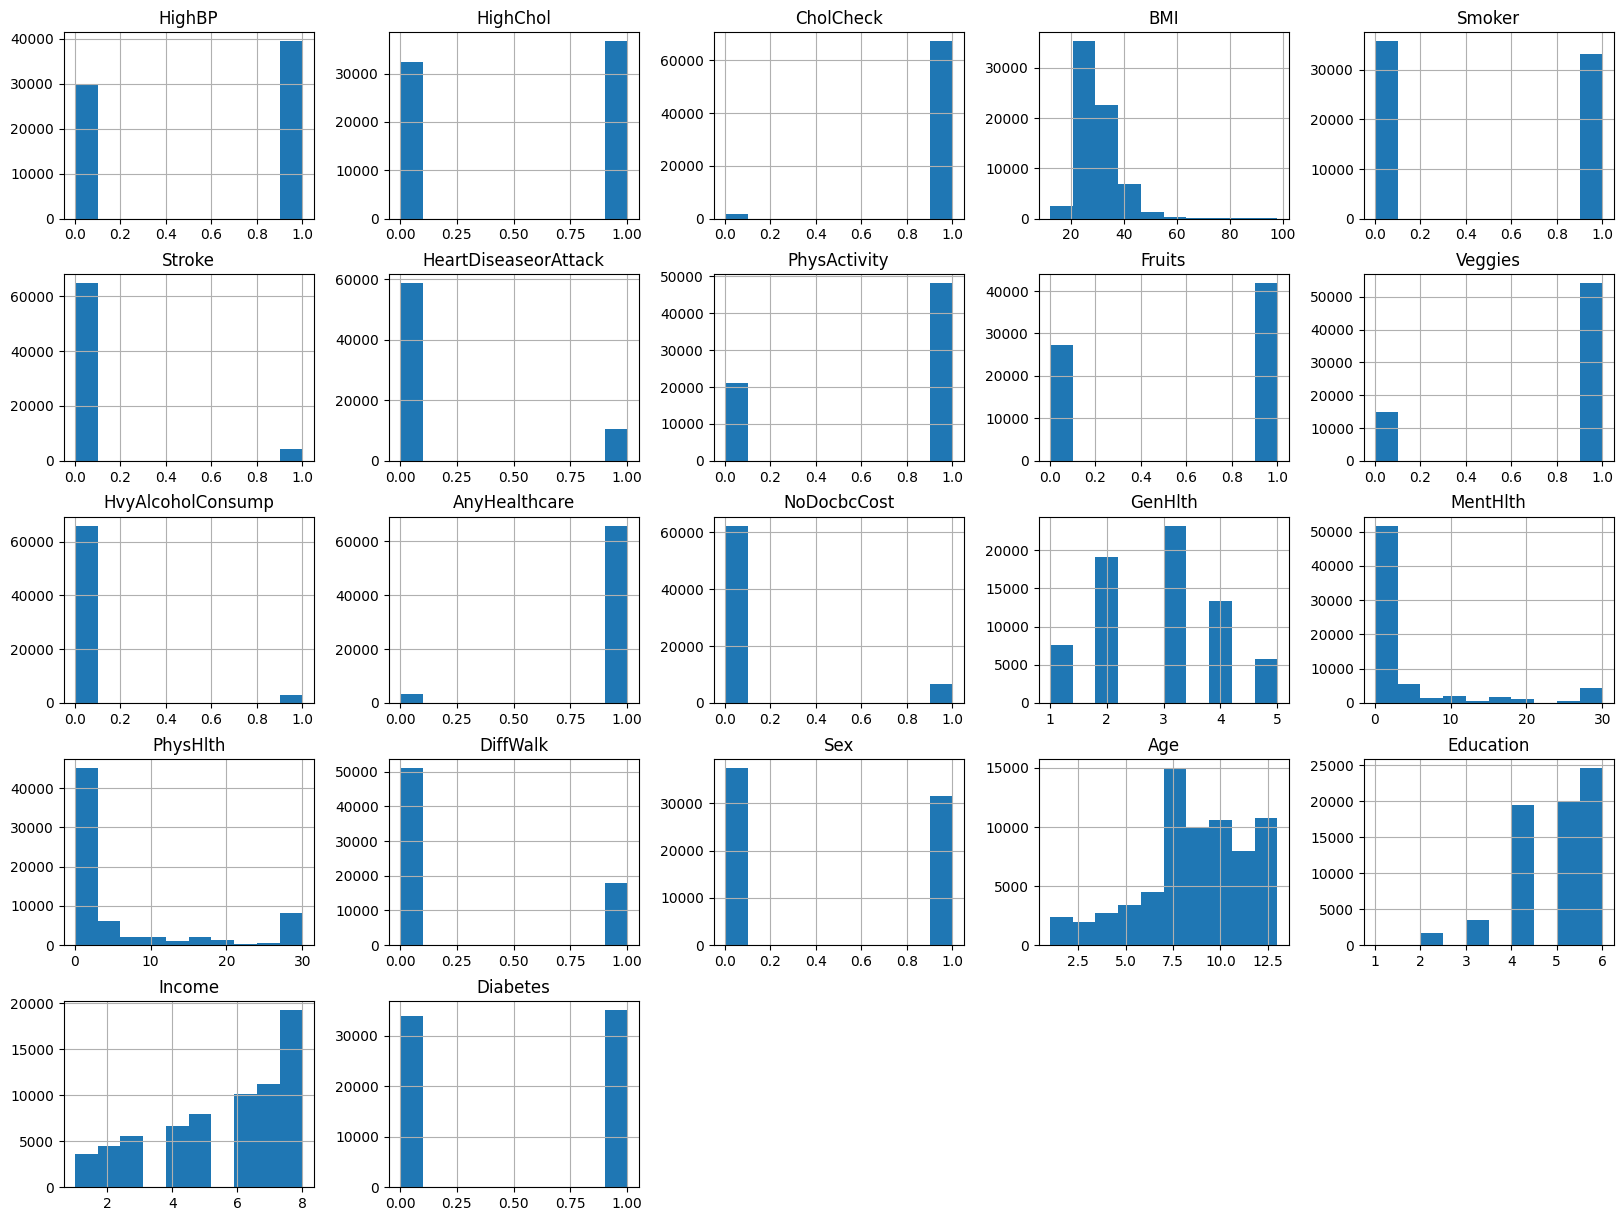

In [ ]:
data.hist(figsize=(20,15))
plt.show()

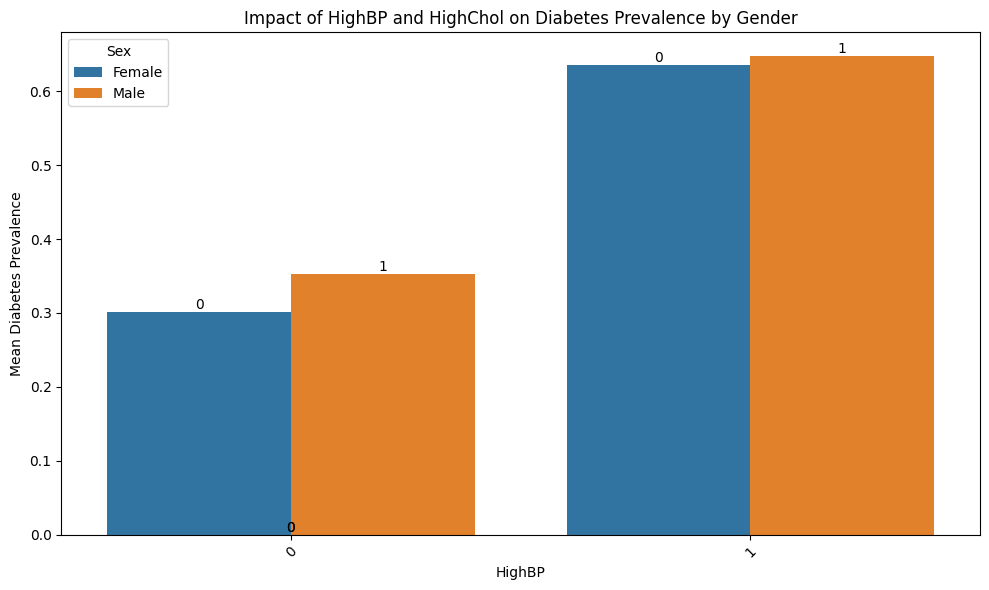

In [ ]:
# Choose two features to analyze
feature1 = 'HighBP'  # Example feature 1
feature2 = 'HighChol'  # Example feature 2

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


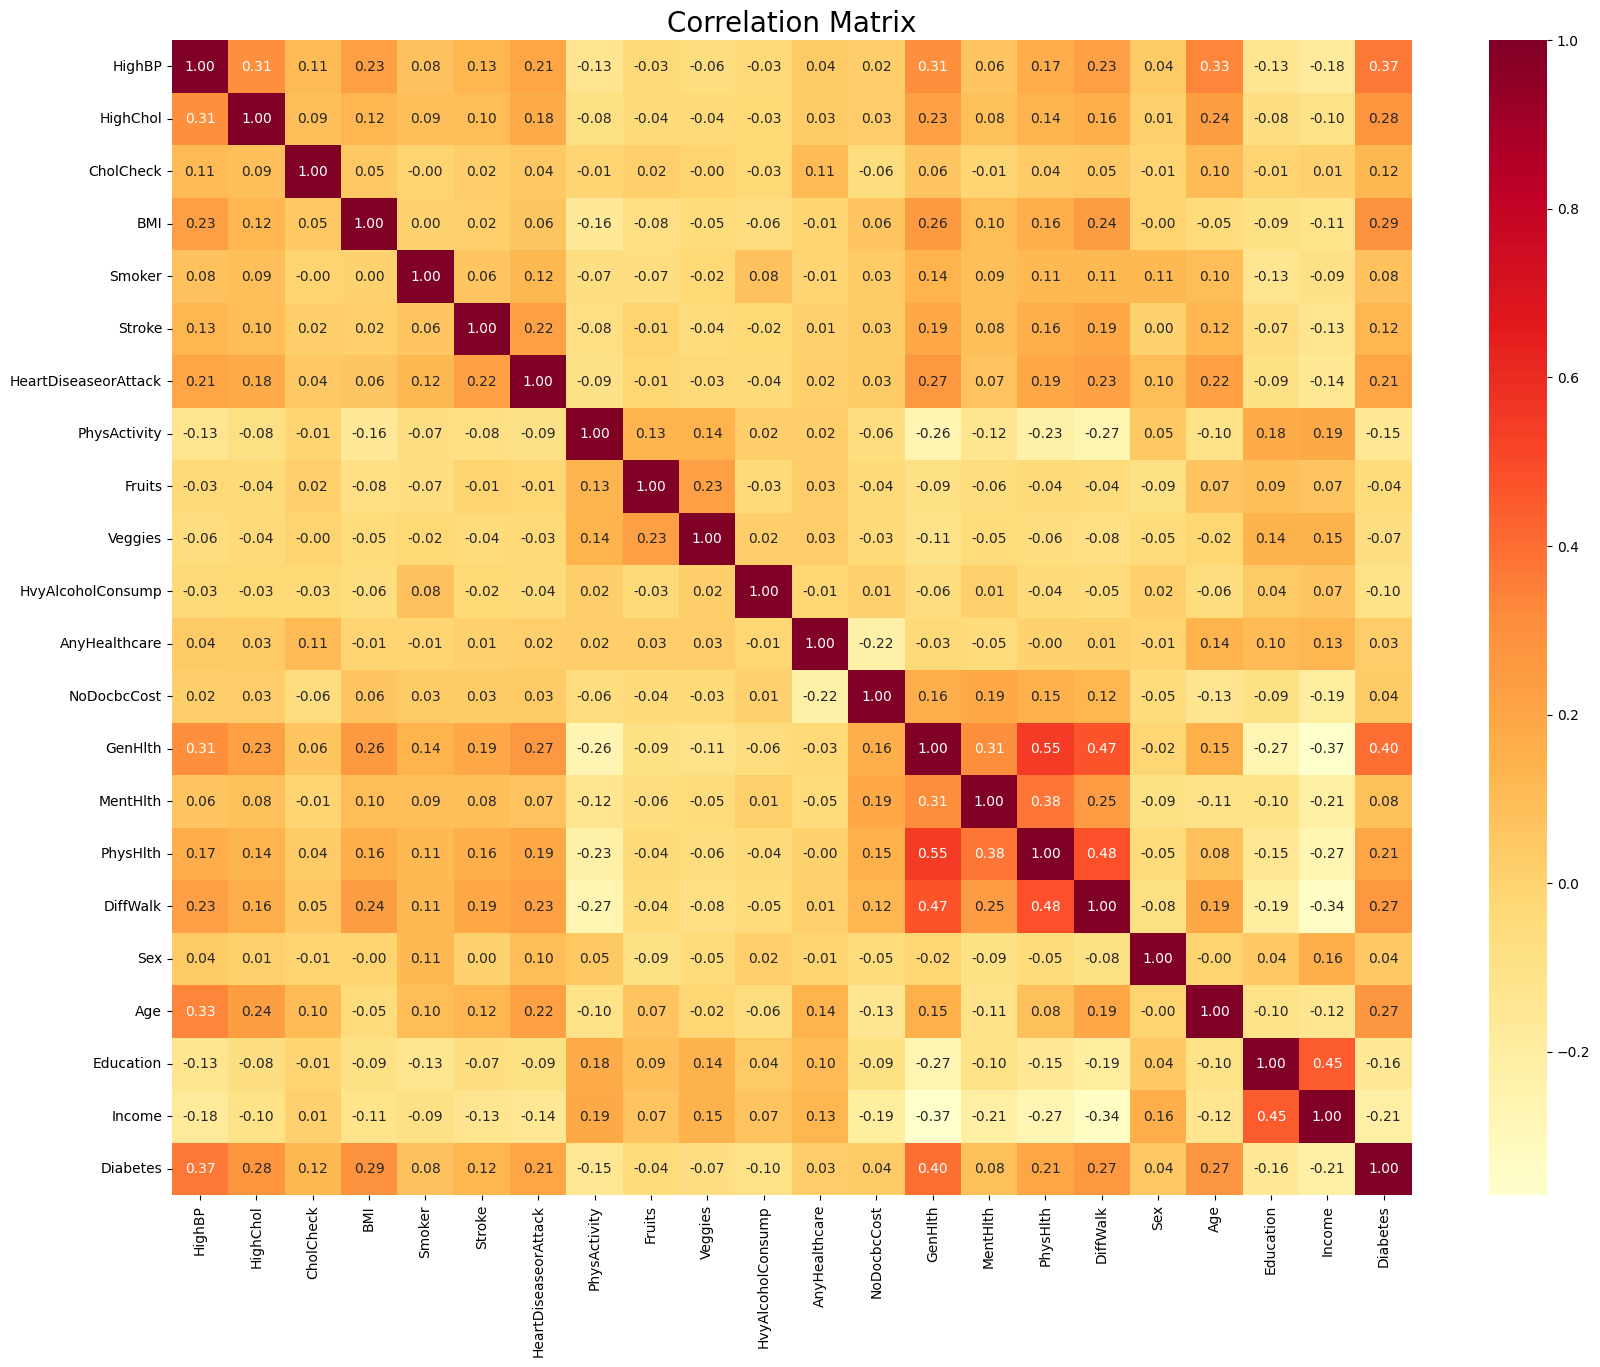

In [ ]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**Splitting**

In [31]:
data1=data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
data1.head()

,Diabetes,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,40,0,0,0,0,1,5,15,1,0,9,4,3
1,0,0,0,25,0,0,1,0,0,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,1,5,30,1,0,9,4,8
3,0,1,0,27,0,0,1,0,1,2,0,0,0,11,3,6
4,0,1,1,24,0,0,1,0,1,2,0,0,0,11,5,4


In [32]:
from sklearn.model_selection import train_test_split
x= data1.drop('Diabetes', axis=1)
y = data1['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
rf_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print(classification_report(y_test, rf_pred))

[[36073    79  1964]
 [  791     2   113]
 [ 5381    21  1533]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     38116
           1       0.02      0.00      0.00       906
           2       0.42      0.22      0.29      6935

    accuracy                           0.82     45957
   macro avg       0.43      0.39      0.40     45957
weighted avg       0.77      0.82      0.79     45957



Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[36947     0  1169]
 [  823     0    83]
 [ 5698     0  1237]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38116
           1       0.00      0.00      0.00       906
           2       0.50      0.18      0.26      6935

    accuracy                           0.83     45957
   macro avg       0.45      0.38      0.39     45957
weighted avg       0.78      0.83      0.79     45957



knn

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
knn_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print(cm)
print(classification_report(y_test, knn_pred))

[[36168    27  1921]
 [  788     3   115]
 [ 5483    17  1435]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     38116
           1       0.06      0.00      0.01       906
           2       0.41      0.21      0.28      6935

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.39     45957
weighted avg       0.77      0.82      0.79     45957



xgboosting

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
xgb_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, xgb_pred)
print(cm)
print(classification_report(y_test, xgb_pred))

[[37146     1   969]
 [  821     0    85]
 [ 5664     1  1270]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     38116
           1       0.00      0.00      0.00       906
           2       0.55      0.18      0.27      6935

    accuracy                           0.84     45957
   macro avg       0.47      0.39      0.39     45957
weighted avg       0.79      0.84      0.80     45957



In [ ]:
import numpy as np

def predict_diabetes():
    print("\n=== Diabetes Risk Assessment ===")
    print("Please answer the following health-related questions:\n")

    # Dictionary untuk menyimpan pertanyaan dan informasi validasi
    questions = {
        'HighBP': ("Do you have High Blood Pressure? (0 = No, 1 = Yes): ", [0, 1]),
        'HighChol': ("Do you have High Cholesterol? (0 = No, 1 = Yes): ", [0, 1]),
        'BMI': ("What is your Body Mass Index (BMI)? (e.g., 18-40): ", 10, 50),
        'Stroke': ("Have you ever had a Stroke? (0 = No, 1 = Yes): ", [0, 1]),
        'HeartDiseaseorAttack': ("Do you have Heart Disease or had Heart Attack? (0 = No, 1 = Yes): ", [0, 1]),
        'PhysActivity': ("Do you do Physical Activity? (0 = No, 1 = Yes): ", [0, 1]),
        'HvyAlcoholConsump': ("Do you consume Heavy Alcohol? (0 = No, 1 = Yes): ", [0, 1]),
        'AnyHealthcare': ("Do you have any Healthcare? (0 = No, 1 = Yes): ", [0, 1]),
        'GenHlth': ("General Health (1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor): ", 1, 5),
        'PhysHlth': ("Physical Health (days with issues in last 30 days, 0-30): ", 0, 30),
        'DiffWalk': ("Do you have Difficulty Walking? (0 = No, 1 = Yes): ", [0, 1]),
        'Sex': ("Gender (0 = Female, 1 = Male): ", [0, 1]),
        'Age': ("Age Group (1 = 18-24, 2 = 25-29, ..., 13 = 80+): ", 1, 13),
        'Education': ("Education Level (1-6 where 1=Lowest, 6=Highest): ", 1, 6),
        'Income': ("Income Level (1-8 where 1=Lowest, 8=Highest): ", 1, 8)
    }

    features = []

    for key, (question, *valid) in questions.items():
        while True:
            try:
                user_input = input(question)

                # Validasi input
                if len(valid) == 1:  # Untuk pilihan biner [0,1]
                    value = int(user_input)
                    if value not in valid[0]:
                        raise ValueError(f"Please enter {valid[0][0]} or {valid[0][1]}")
                else:  # Untuk range angka
                    value = int(user_input)
                    if not (valid[0] <= value <= valid[1]):
                        raise ValueError(f"Please enter between {valid[0]} and {valid[1]}")

                features.append(value)
                break

            except ValueError as e:
                print(f"Invalid input: {e}. Please try again.")

    # Convert features to a NumPy array and reshape for prediction
    features_array = np.array(features).reshape(1, -1)

    # Fit the model inside the function using global x_train and y_train
    from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier here, incase the user has overwritten it as a variable
    rf = RandomForestClassifier() # re-instantiate rf as well, if it was overwritten
    rf.fit(x_train, y_train)


    # Use the trained Random Forest model to make a prediction
    prediction = rf.predict(features_array)[0]

    # Hasil dengan penjelasan lebih jelas
    result = "Diabetic" if prediction == 2 else "Non-Diabetic"
    print("\n=== Assessment Result ===")
    print(f"Based on your inputs, your diabetes risk is: {result}")

    return result

# Contoh penggunaan:
if __name__ == "__main__":

    # Jalankan assessment
    prediction_result = predict_diabetes()


=== Diabetes Risk Assessment ===
Please answer the following health-related questions:

Do you have High Blood Pressure? (0 = No, 1 = Yes): 1
Do you have High Cholesterol? (0 = No, 1 = Yes): 1
What is your Body Mass Index (BMI)? (e.g., 18-40): 23
Have you ever had a Stroke? (0 = No, 1 = Yes): 1
Do you have Heart Disease or had Heart Attack? (0 = No, 1 = Yes): 1
Do you do Physical Activity? (0 = No, 1 = Yes): 
Invalid input: invalid literal for int() with base 10: ''. Please try again.
Do you do Physical Activity? (0 = No, 1 = Yes): 1
Do you consume Heavy Alcohol? (0 = No, 1 = Yes): 1
Do you have any Healthcare? (0 = No, 1 = Yes): 1
General Health (1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor): 1
Physical Health (days with issues in last 30 days, 0-30): 1
Do you have Difficulty Walking? (0 = No, 1 = Yes): 1
Gender (0 = Female, 1 = Male): 1
Age Group (1 = 18-24, 2 = 25-29, ..., 13 = 80+): 1
Education Level (1-6 where 1=Lowest, 6=Highest): 1
Income Level (1-8 where 1=Lowest